In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using TensorFlow backend.


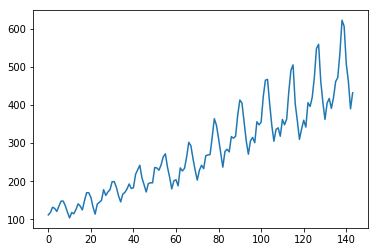

In [2]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [4]:
dataset = scaler.fit_transform(dataset.values)

/Users/fanfan/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [5]:
dataset.shape

(144, 1)

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size], dataset[train_size:]

In [7]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
train.shape

(96, 1)

In [19]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

In [20]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dense

In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
4s - loss: 0.0129
Epoch 2/100
3s - loss: 0.0065
Epoch 3/100
3s - loss: 0.0060
Epoch 4/100
3s - loss: 0.0053
Epoch 5/100
3s - loss: 0.0048
Epoch 6/100
2s - loss: 0.0047
Epoch 7/100
3s - loss: 0.0045
Epoch 8/100
3s - loss: 0.0045
Epoch 9/100
2s - loss: 0.0045
Epoch 10/100
3s - loss: 0.0045
Epoch 11/100
3s - loss: 0.0044
Epoch 12/100
2s - loss: 0.0045
Epoch 13/100
2s - loss: 0.0045
Epoch 14/100
2s - loss: 0.0044
Epoch 15/100
3s - loss: 0.0043
Epoch 16/100
3s - loss: 0.0043
Epoch 17/100
3s - loss: 0.0044
Epoch 18/100
3s - loss: 0.0044
Epoch 19/100
3s - loss: 0.0044
Epoch 20/100
3s - loss: 0.0042
Epoch 21/100
3s - loss: 0.0041
Epoch 22/100
3s - loss: 0.0044
Epoch 23/100
3s - loss: 0.0042
Epoch 24/100
3s - loss: 0.0043
Epoch 25/100
3s - loss: 0.0042
Epoch 26/100
3s - loss: 0.0042
Epoch 27/100
2s - loss: 0.0042
Epoch 28/100
3s - loss: 0.0040
Epoch 29/100
3s - loss: 0.0040
Epoch 30/100
3s - loss: 0.0039
Epoch 31/100
3s - loss: 0.0041
Epoch 32/100
3s - loss: 0.0039
Epoch 33/100
3s -

In [15]:
trainY

array([  53976.,   61228.,   59674.,   65372.,   73142.,   70034.,
         64854.,   77286.,   88164.,   88164.,   81948.,   68998.,
         59156.,   72624.,   75214.,   77804.,   92308.,   84538.,
         89200.,   92308.,  103186.,  103186.,   95416.,   84020.,
         75732.,   86092.,   88682.,   93344.,  100078.,   93862.,
         94898.,  113028.,  119244.,  125460.,  108366.,   99042.,
         89200.,  100596.,  101632.,  101632.,  122352.,  121834.,
        118726.,  125978.,  136856.,  141000.,  122870.,  109402.,
         93344.,  104222.,  105776.,   97488.,  121834.,  117690.,
        121316.,  136856.,  156540.,  151878.,  134266.,  118726.,
        105258.,  118726.,  125460.,  120798.,  138410.,  139446.,
        139964.,  163274.,  188656.,  179850.,  161720.,  142036.,
        122870.,  144108.,  147216.,  143590.,  164310.,  162238.,
        164828.,  193836.,  214038.,  209894.,  183994.,  158612.,  140482.])

In [21]:
import math
from sklearn.metrics import mean_squared_error
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.37 RMSE
Test Score: 41.24 RMSE


/Users/fanfan/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/fanfan/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


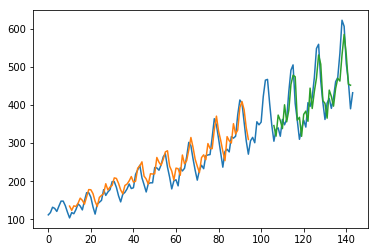

In [25]:
import numpy
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()